In [ ]:
Scrip para graficar las metricas de pre seleccion antes guardadas

In [ ]:
# Data reading
# ==============================================================================
import numpy as np
import pandas as pd
import xarray as xr
import glob

# Graphics 
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Warnings configuration 
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Path of data 
mt_path = 'D:/Documentos/Maestria/MLG/Pre_selection/'

In [ ]:
# list of metrics data arrays
nm_met_files = np.sort(glob.glob(mt_path+'*pre_metrics.nc'))
ad_met_files = np.sort(glob.glob(mt_path+'*pre_metrics_advanced.nc'))

In [13]:
# Build a function to integrate space by a choosen statistic 
def dt_to_df(dt, stat, horizon):
    if stat=='mean':
        stat_arr = np.nanmean(dt, axis=(2,3))
    elif stat=='median':
        stat_arr = np.nanmedian(dt, axis=(2,3))
    elif stat=='min':
        stat_arr = np.min(dt, axis=(2,3))
    elif stat=='sum':
        stat_arr = np.sum(dt, axis=(2,3))
    else:
        print('stat no valid')
        
    df = pd.DataFrame(stat_arr.transpose(), columns=list(dt.model.values))
    
    metrics = pd.Series(list(dt.metric.values))
    hzn = [horizon]*len(metrics)
    hzn = pd.Series(hzn)
    
    df['metric'] = metrics
    df['hzon'] = hzn
    
    return df

In [9]:
hzons = [1, 2, 3, 6, 9, 12, 16, 20, 24]

In [119]:
# Dataframe to concatenate all horizons
nm_df = pd.DataFrame()
for i in range(len(nm_met_files)):
    metrics_dt = xr.open_dataarray(nm_met_files[i])
    stats_df = dt_to_df(metrics_dt, 'sum', hzons[i])
    nm_df = pd.concat([nm_df, stats_df], ignore_index=True)

In [120]:
nm_df = nm_df.drop('svm', axis=1)

In [121]:
ad_df = pd.DataFrame()
for i in range(len(nm_met_files)):
    metrics_dt = xr.open_dataarray(ad_met_files[i])
    stats_df = dt_to_df(metrics_dt, 'sum',hzons[i])
    ad_df = pd.concat([ad_df, stats_df], ignore_index=True)

In [122]:
nm_df[ad_df.columns[0:3]] = ad_df[ad_df.columns[0:3]]
re_cols = ['lmr', 'knn', 'tre', 'rf', 'bag', 'mlp', 'metric', 'hzon']
nm_df = nm_df[re_cols]

In [123]:
mts = np.unique(nm_df['metric'])

In [124]:
mts_label = ['RMSE(estand)_Val', 't_comp [seg]', '$r^2$_Ent', '$r^2$_Val']

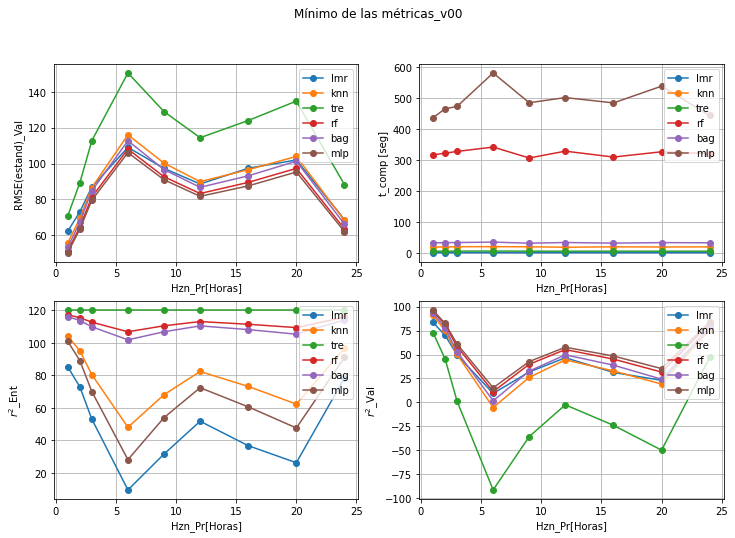

In [125]:
fig = plt.figure(figsize=(12,8))
plt.suptitle('Mínimo de las métricas_v00')
for i in range(len(mts)):
    ax  = plt.subplot(2, 2, i+1)
    nm_df[nm_df['metric']==mts[i]].plot(x='hzon',
                                        y=nm_df.columns[0:-2], 
                                        ax=ax,
                                        kind='line', 
                                        style='-o',
                                        grid=':', 
                                        xlabel='Hzn_Pr[Horas]', 
                                        ylabel=mts_label[i])
    plt.legend(loc=1)
    
#plt.savefig(save_imgs+'00_presel.png', dpi=300)

In [126]:
nm_df_2 = nm_df.drop('tre', axis=1)

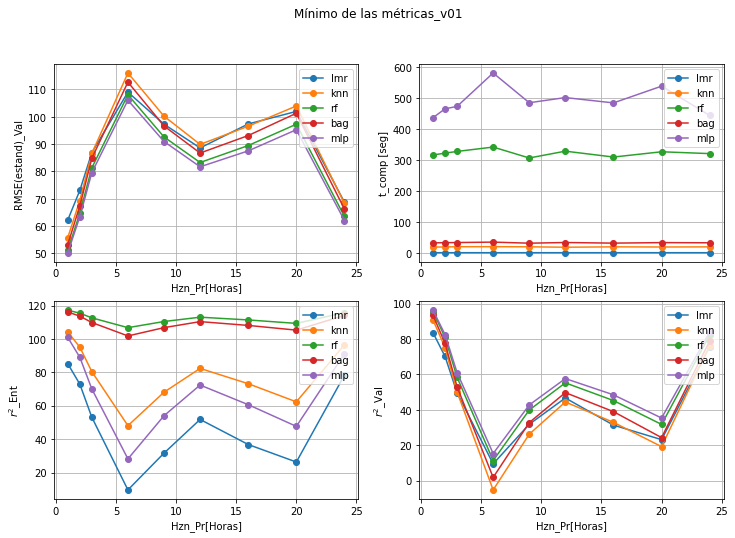

In [127]:
fig = plt.figure(figsize=(12,8))
plt.suptitle('Mínimo de las métricas_v01')
for i in range(len(mts)):
    ax  = plt.subplot(2, 2, i+1)
    nm_df[nm_df['metric']==mts[i]].plot(x='hzon',
                                        y=nm_df_2.columns[0:-2], 
                                        ax=ax,
                                        kind='line', 
                                        style='-o',
                                        grid=':', 
                                        xlabel='Hzn_Pr[Horas]', 
                                        ylabel=mts_label[i])
    plt.legend(loc=1)
    
#plt.savefig(save_imgs+'01_presel.png', dpi=300)

In [128]:
nm_df_3 = nm_df_2.drop(['bag', 'rf'], axis=1)

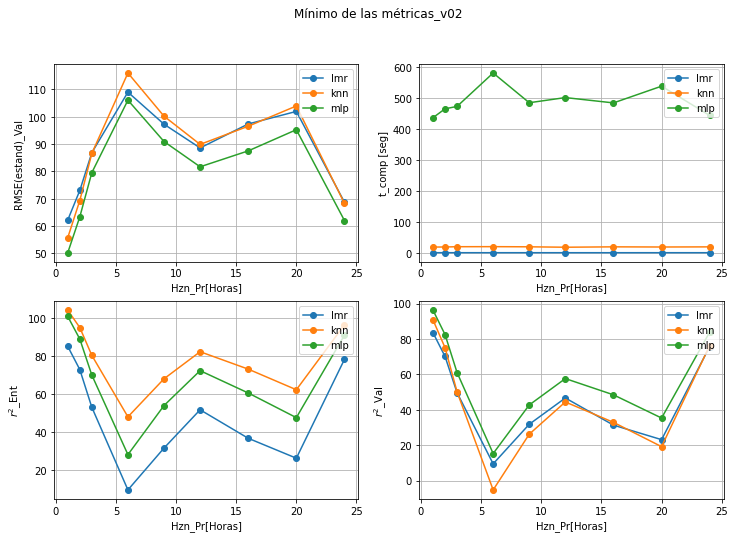

In [129]:
fig = plt.figure(figsize=(12,8))
plt.suptitle('Mínimo de las métricas_v02')
for i in range(len(mts)):
    ax  = plt.subplot(2, 2, i+1)
    nm_df[nm_df['metric']==mts[i]].plot(x='hzon',
                                        y=nm_df_3.columns[0:-2], 
                                        ax=ax,
                                        kind='line', 
                                        style='-o',
                                        grid=':', 
                                        xlabel='Hzn_Pr[Horas]', 
                                        ylabel=mts_label[i])
    plt.legend(loc=1)
    
#plt.savefig(save_imgs+'02_presel.png', dpi=300)